In [97]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
from fastai.imports import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
import IPython
from pandas.api.types import is_string_dtype, is_numeric_dtype

from sklearn import metrics
from pathlib2 import Path
import feather
from sklearn.tree import export_graphviz
import re
import graphviz
from sklearn.ensemble import forest

import warnings
warnings.filterwarnings('ignore')

In [99]:
path = Path('/kaggle/input/bluebook-for-bulldozers')
list(path.iterdir())

[PosixPath('/kaggle/input/bluebook-for-bulldozers/TrainAndValid.csv'),
 PosixPath('/kaggle/input/bluebook-for-bulldozers/valid'),
 PosixPath('/kaggle/input/bluebook-for-bulldozers/trainandvalid'),
 PosixPath('/kaggle/input/bluebook-for-bulldozers/Data Dictionary.xlsx'),
 PosixPath('/kaggle/input/bluebook-for-bulldozers/random_forest_benchmark_test.csv'),
 PosixPath('/kaggle/input/bluebook-for-bulldozers/ValidSolution.csv'),
 PosixPath('/kaggle/input/bluebook-for-bulldozers/Test.csv'),
 PosixPath('/kaggle/input/bluebook-for-bulldozers/Machine_Appendix.csv'),
 PosixPath('/kaggle/input/bluebook-for-bulldozers/Valid.csv'),
 PosixPath('/kaggle/input/bluebook-for-bulldozers/train'),
 PosixPath('/kaggle/input/bluebook-for-bulldozers/median_benchmark.csv')]

In [100]:
df_raw = pd.read_csv(f'{path}/TrainAndValid.csv', low_memory=False, parse_dates=['saledate'])

In [101]:
def display_all(df):
    with pd.option_context('display.max_rows', 1000, 'display.max_columns', 1000):
        display(df)

In [102]:
print(df_raw.shape)
display_all(df_raw.tail().T)

(412698, 53)


,412693,412694,412695,412696,412697
SalesID,6333344,6333345,6333347,6333348,6333349
SalePrice,10000,10500,12500,10000,13000
MachineID,1919201,1882122,1944213,1794518,1944743
ModelID,21435,21436,21435,21435,21436
datasource,149,149,149,149,149
auctioneerID,2,2,2,2,2
YearMade,2005,2005,2005,2006,2006
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2012-03-07 00:00:00,2012-01-28 00:00:00,2012-01-28 00:00:00,2012-03-07 00:00:00,2012-01-28 00:00:00


In [103]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
SalesID,412698,NaN,NaN,NaN,NaT,NaT,2.01116e+06,1.08007e+06,1.13925e+06,1.4219e+06,1.64585e+06,2.26101e+06,6.33335e+06
SalePrice,412698,NaN,NaN,NaN,NaT,NaT,31215.2,23141.7,4750,14500,24000,40000,142000
MachineID,412698,NaN,NaN,NaN,NaT,NaT,1.23006e+06,453953,0,1.08859e+06,1.2844e+06,1.47808e+06,2.48633e+06
ModelID,412698,NaN,NaN,NaN,NaT,NaT,6947.2,6280.82,28,3261,4605,8899,37198
datasource,412698,NaN,NaN,NaN,NaT,NaT,135.169,9.64675,121,132,132,136,173
auctioneerID,392562,NaN,NaN,NaN,NaT,NaT,6.58527,17.1584,0,1,2,4,99
YearMade,412698,NaN,NaN,NaN,NaT,NaT,1899.05,292.19,1000,1985,1995,2001,2014
MachineHoursCurrentMeter,147504,NaN,NaN,NaN,NaT,NaT,3522.99,27169.9,0,0,0,3209,2.4833e+06
UsageBand,73670,3,Medium,35832,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,412698,4013,2009-02-16 00:00:00,1932,1989-01-17,2012-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

### Initial processing

In [105]:
def set_rf_samples(n):
    """ Changes Scikit learn's random forests to give each tree a random sample of
    n random rows.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n))

def reset_rf_samples():
    """ Undoes the changes produced by set_rf_samples.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n_samples))

    
def parallel_trees(m, fn, n_jobs=8):
    return list(ProcessPoolExecutor(n_jobs).map(fn, m.estimators_))

def draw_tree(t, df, size=10, ratio=0.6, precision=0):
    s = export_graphviz(t, out_file=None, feature_names=df.columns, filled=True,
                        special_characters=True, rotate=True, precision=precision)
    Ipython.display.display(re.sub(graphviz.Source('Tree {', f'Tree {{ size = {size}; ratio={ratio}', s)))
    
def rf_feature_imp(m, df):
    return pd.DataFrame({'cols': df.columns, 'importance': m.feature_importances_}).sort_values('importance', ascending=False)

def add_datepart(df, fldname, drop=True, time=False):
    fld = df[fldname]
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64
        
    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    if time:
        attr = attr + ['Hour', 'Minute', 'Second']
    for n in attr:
        df[targ_pre + n] = getattr(fld.dt, n.lower())
    df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
    if drop:
        df.drop(fldname, axis=1, inplace=True)
    
def train_cats(df):
    for n, c in df.items():
        if is_string_dtype(c):
            df[n] = c.astype('category').cat.as_ordered()

        
def numericalize(df, col, name, max_n_cat):
    if not is_numeric_dtype(col) and ( max_n_cat is None or len(col.cat.categories)>max_n_cat):
        df[name] = col.cat.codes+1
        
        
def get_sample(df, n):
    idxs = sorted(np.random.permutation(len(df))[:n])
    return df.iloc[idxs].copy()


def fix_missing(df, col, name, na_dict):
    if is_numeric_dtype(col):
        if pd.isnull(col).sum() or (name in na_dict):
            df[name+'_na'] = pd.isnull(col)
            filler = na_dict[name] if name in na_dict else col.median()
            df[name] = col.fillna(filler)
            na_dict[name] = filler
    return na_dict

def proc_df(df, y_fld, skip_flds=None, ignore_flds=None, do_scale=False, na_dict=None,
            preproc_fn=None, max_n_cat=None, subset=None, mapper=None):
    if not skip_flds:
        skip_flds = []
    if not ignore_flds:
        ignore_flds = []
    if subset:
        df = get_sample(df, subset)
    else:
        df = df.copy()
    ignored_flds = df.loc[:, ignore_flds]
    df.drop(ignore_flds, axis=1, inplace=True)
    if preproc_fn:
        preproc_fn(df)
    if y_fld is None:
        y = None
    else:
        if not is_numeric_dtype(df[y_fld]):
            df[y_fld] = df[y_fld].cat.codes
        y = df[y_fld].values
        skip_flds += [y_fld]
    df.drop(skip_flds, axis=1, inplace=True)
    
    if na_dict is None:
        na_dict = {}
    else:
        na_dict = na_dict.copy()
    na_dict_initial = na_dict.copy()
    for n, c in df.items():
        na_dict = fix_missing(df, c, n, na_dict)
    if len(na_dict_initial.keys()) > 0:
        df.drop([a + '_na' for a in list(set(na_dict.keys()) - set(na_dict_initial.keys()))], axis=1, inplace=True)
    if do_scale:
        mapper = scale_vars(df, mapper)
    for n, c in df.items():
        numericalize(df, c, n, max_n_cat)
    df = pd.get_dummies(df, dummy_na=True)
    df = pd.concat([ignored_flds, df], axis=1)
    res = [df, y, na_dict]
    if do_scale:
        res = res + mapper
    return res

def draw_tree(t, df, size=10, ratio=0.6, precision=0):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True,
                      special_characters=True, rotate=True, precision=precision)
    IPython.display.display(graphviz.Source(re.sub('Tree {', f'Tree {{ size = {size}; ratio={ratio}', s)))
    
def parallel_trees(m, fn, n_jobs=8):
    return list(ProcessPoolExecutor(n_jobs).map(fn, m.estimators_))

def rf_feature_imp(m, df):
    return pd.DataFrame({'cols': df.columns, 'importance': m.feature_importances_}).sort_values('importance', ascending=False)

In [106]:
add_datepart(df_raw, 'saledate')

In [107]:
df_raw.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [108]:
df_raw.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,Low,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,Low,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,High,226,...,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,Medium,S175,...,23,3,204,False,False,False,False,False,False,1248307200


In [109]:
train_cats(df_raw)

In [110]:
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [111]:
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)

In [112]:
df_raw.UsageBand = df_raw.UsageBand.cat.codes

In [113]:
display_all(df_raw.isnull().sum().sort_index() / len(df_raw))

Backhoe_Mounting            0.804428
Blade_Extension             0.937041
Blade_Type                  0.801610
Blade_Width                 0.937041
Coupler                     0.465277
Coupler_System              0.891024
Differential_Type           0.826595
Drive_System                0.740520
Enclosure                   0.000809
Enclosure_Type              0.937041
Engine_Horsepower           0.937041
Forks                       0.520921
Grouser_Tracks              0.891264
Grouser_Type                0.752378
Hydraulics                  0.200062
Hydraulics_Flow             0.891264
MachineHoursCurrentMeter    0.642586
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.803498
Pattern_Changer             0.752213
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.524851
Pushblock                   0.937041
Ride_Control                0.629928
Ripper                      0.740864
S

In [114]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/bulldozers-raw')

### Pre-processing

In [115]:
# df_raw = feather.read_dataframe('tmp/bulldozer-raw')

In [116]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [117]:
rmse = lambda x, y: math.sqrt(((x - y) ** 2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train),
           rmse(m.predict(X_valid), y_valid),
           m.score(X_train, y_train),
           m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'):
        res.append(m.oob_score_)
    print(res)

In [118]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

0.9831826140636881

In [119]:
def split_vals(a, n):
    return a[:n].copy(), a[n:].copy()

In [120]:
n_valid = 12000
n_trn = len(df) - n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((400698, 66), (400698,), (12000, 66), (12000,))

In [121]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=10)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 1min 43s, sys: 564 ms, total: 1min 43s
Wall time: 32.8 s
[0.09028611407555566, 0.26808768655903403, 0.9830503103802728, 0.8682504859032706]


In [122]:
df_raw.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,2,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,2,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,0,226,...,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,0,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,1,S175,...,23,3,204,False,False,False,False,False,False,1248307200


In [123]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [124]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 240 ms, sys: 4 ms, total: 244 ms
Wall time: 269 ms
[0.5183807466925995, 0.5998246027772627, 0.42868947386822676, 0.3404559020880519]


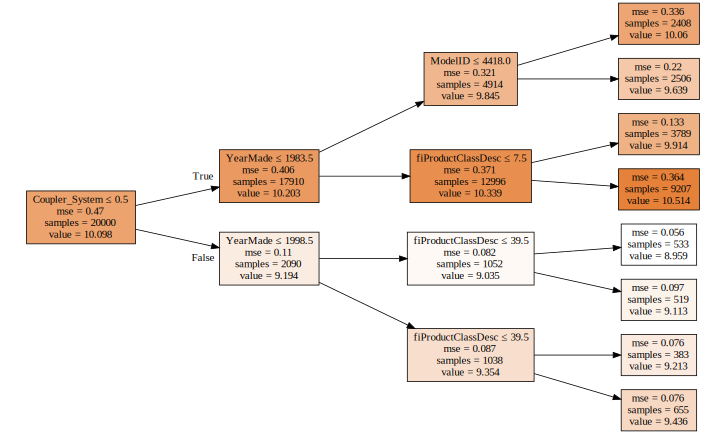

In [125]:
draw_tree(m.estimators_[0], df_trn, precision=3)

In [126]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.1108406860161961, 0.4182859907222711, 0.9738800157891806, 0.679268269925514]


In [127]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([ 9.85219426,  9.680344  , 11.51292546,  9.47270464, 10.20359214,
         9.39266193, 10.27505111,  9.47270464, 10.27505111, 10.20359214]),
 10.034082143390837,
 10.768484990022733)

In [128]:
preds.shape

(10, 12000)

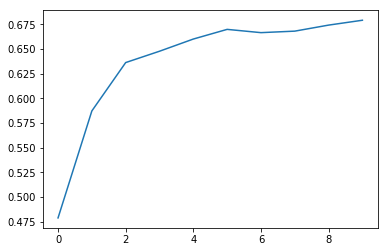

In [129]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)])

In [130]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.10006546138531046, 0.3966684104990285, 0.9787116057606818, 0.711563298787338]


In [131]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.09566489328280738, 0.4090190964099767, 0.9805428295832002, 0.6933221160116199]


In [132]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.09315736848975405, 0.40529707565491807, 0.9815494666802851, 0.6988781787171824]


In [133]:
m = RandomForestRegressor(n_estimators=100, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.09304144844769932, 0.40023048480380014, 0.9815953558232962, 0.7063597277530074]


In [134]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.0927701595655319, 0.39835730870118424, 0.9817025273303321, 0.7091019115753836, 0.8666472718965387]


In [135]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [136]:
set_rf_samples(20000)

In [137]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.24154373223213338, 0.2951560380037316, 0.878685874397569, 0.8403023107474615, 0.8663689123288072]


In [138]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.22724786248010112, 0.27830321953568693, 0.8926209787807031, 0.8580185035906184, 0.8814432532034042]


In [139]:
reset_rf_samples()

In [140]:
def dectree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right
    
    def walk(node_id):
        if children_left[node_id] != children_right[node_id]:
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else:
            return 1
    root_node_id = 0
    return walk(root_node_id)
    

In [141]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07822875500220385, 0.25103597986862697, 0.9872751502125257, 0.8844773265129646, 0.9092681026670003]


In [142]:
t = m.estimators_[0].tree_

In [143]:
dectree_max_depth(t)

47

In [144]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.1402168654085746, 0.24697054598809362, 0.9591191106290166, 0.8881887219040343, 0.9081834037975887]


In [145]:
t = m.estimators_[0].tree_
dectree_max_depth(t)

36

In [146]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.11463973693700358, 0.24678292602472418, 0.9726731112452819, 0.8883585402073796, 0.909622318419615]


In [147]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.11909108966925491, 0.23943757758938322, 0.97050975604449, 0.8949055193727106, 0.9121035386829848]


In [148]:
raw_train, raw_valid = split_vals(df_raw, n_trn)

In [149]:
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
np.mean(preds[:, 0]), np.std(preds[:, 0])

CPU times: user 4.14 s, sys: 4 ms, total: 4.15 s
Wall time: 4.15 s


(10.509600194640209, 0.2548272746783783)

In [150]:
preds.shape

(40, 12000)

In [151]:
def get_preds(t): return t.predict(X_valid)
%time preds = np.stack(parallel_trees(m, get_preds))
np.mean(preds[:,0]), np.std(preds[:, 0])

CPU times: user 384 ms, sys: 620 ms, total: 1 s
Wall time: 2.47 s


(10.509600194640209, 0.2548272746783783)

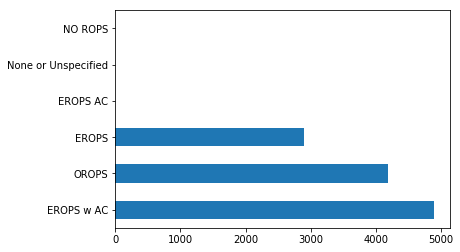

In [152]:
x = raw_valid.copy()
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)
x.Enclosure.value_counts().plot.barh()

In [153]:
flds = ['Enclosure', 'SalePrice', 'pred', 'pred_std']
enc_summ = x[flds].groupby('Enclosure', as_index=False).mean()
enc_summ

,Enclosure,SalePrice,pred,pred_std
0,EROPS,9.899226,9.902723,0.243929
1,EROPS AC,9.305651,9.768456,0.530567
2,EROPS w AC,10.638201,10.603607,0.216287
3,NO ROPS,NaN,NaN,NaN
4,None or Unspecified,NaN,NaN,NaN
5,OROPS,9.876225,9.858894,0.210789


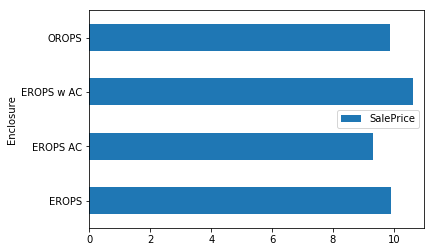

In [154]:
enc_summ = enc_summ[~pd.isnull(enc_summ.SalePrice)]
enc_summ.plot('Enclosure', 'SalePrice', 'barh', xlim=(0, 11))

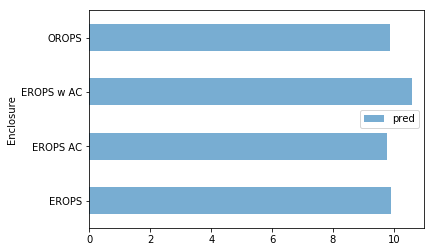

In [155]:
enc_summ.plot('Enclosure', 'pred', 'barh', alpha=0.6, xlim=(0, 11))

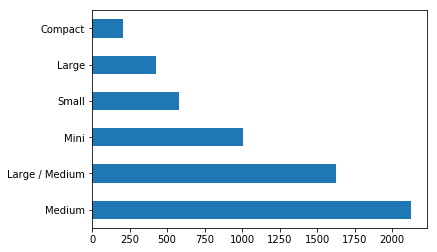

In [156]:
raw_valid.ProductSize.value_counts().plot.barh()

In [157]:
flds = ['ProductSize', 'SalePrice', 'pred', 'pred_std']
summ = x[flds].groupby('ProductSize').mean()
summ

,SalePrice,pred,pred_std
ProductSize,,,
Compact,9.706515,9.718644,0.263978
Large,10.639695,10.564217,0.326785
Large / Medium,10.698560,10.677579,0.243066
Medium,10.728355,10.705115,0.237288
Mini,9.592279,9.613882,0.224530
Small,10.406021,10.343805,0.248709


In [158]:
(summ.pred_std / summ.pred).sort_values(ascending=False)

ProductSize
Large             0.030933
Compact           0.027162
Small             0.024044
Mini              0.023355
Large / Medium    0.022764
Medium            0.022166
dtype: float64

## Feature Importance

In [159]:
fi = rf_feature_imp(m, df_trn); fi[:10]

,cols,importance
5,YearMade,0.172096
37,Coupler_System,0.105129
13,ProductSize,0.104781
14,fiProductClassDesc,0.085281
2,ModelID,0.063890
63,saleElapsed,0.052294
39,Hydraulics_Flow,0.046975
38,Grouser_Tracks,0.043356
10,fiSecondaryDesc,0.039466
8,fiModelDesc,0.034711


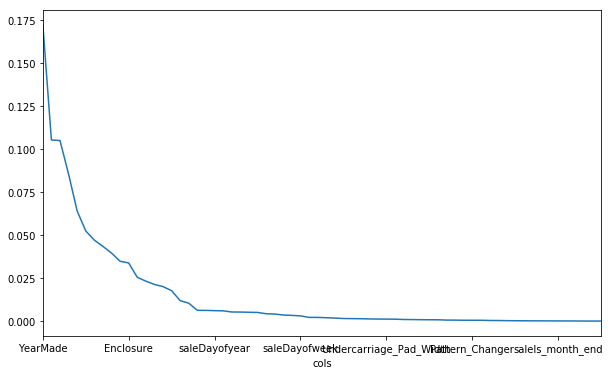

In [160]:
fi.plot('cols', 'importance', figsize=(10, 6), legend=False)

In [161]:
def plot_fi(fi):
    return fi.plot('cols', 'importance', 'barh', figsize=(12, 7), legend=False)

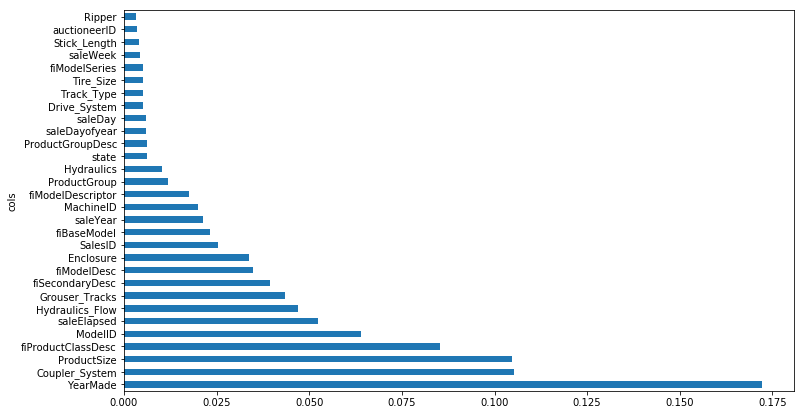

In [162]:
plot_fi(fi[:30])

In [163]:
to_keep = fi[fi.importance > 0.005].cols
len(to_keep)

26

In [164]:
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [165]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.12348991141226219, 0.24061297683891372, 0.968290982524075, 0.8938711690057891, 0.9113359078713381]


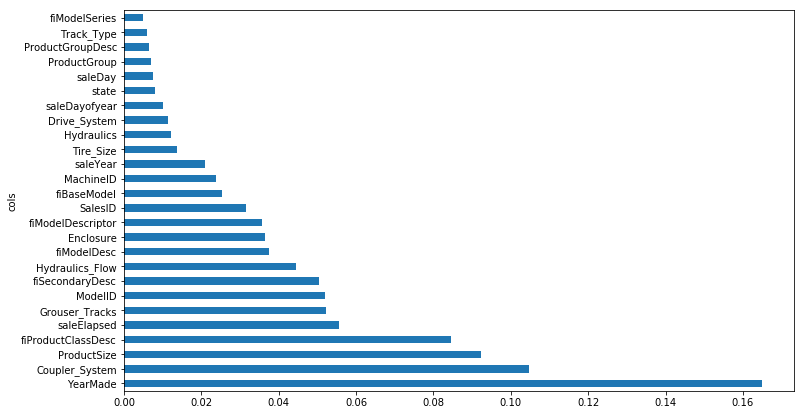

In [166]:
fi = rf_feature_imp(m, df_keep)
plot_fi(fi)

In [167]:
for row in df_keep.columns.values:
    df_shuffled = df_keep.copy()
    df_shuffled[row] = np.random.permutation(df_keep[row].values)
    print(f"Column shuffled:: {row}")
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
    X_train, X_valid = split_vals(df_shuffled, n_trn)
    m.fit(X_train, y_train)
    print_score(m)

Column shuffled:: YearMade
[0.1313890415020348, 0.260112433387759, 0.9641046563045902, 0.8759726364137281, 0.8973295102300105]
Column shuffled:: Coupler_System
[0.12341359898367625, 0.2398641536757433, 0.9683301605335288, 0.8945307183292569, 0.911052566430942]
Column shuffled:: ProductSize
[0.12439932047837676, 0.2445687594301587, 0.9678222373943385, 0.8903528748465659, 0.9078651760710275]
Column shuffled:: fiProductClassDesc
[0.12291150866183065, 0.24464232172715455, 0.9685873246438307, 0.8902869047901378, 0.9082515307060286]
Column shuffled:: ModelID
[0.12203927411796879, 0.2428593340662465, 0.9690315792519036, 0.8918802861083642, 0.9092226169670324]
Column shuffled:: saleElapsed
[0.12475083210678628, 0.24100579621903268, 0.9676401328929098, 0.8935243590141195, 0.9067265219825661]
Column shuffled:: Hydraulics_Flow
[0.12342010808737694, 0.24049206862058525, 0.9683268197719406, 0.8939778018568538, 0.911135411714545]
Column shuffled:: Grouser_Tracks
[0.12341971537012278, 0.2402067074623

In [168]:
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.11787551801031539, 0.24267389430061742, 0.9711087018730232, 0.892045336711194, 0.9111309033785188]


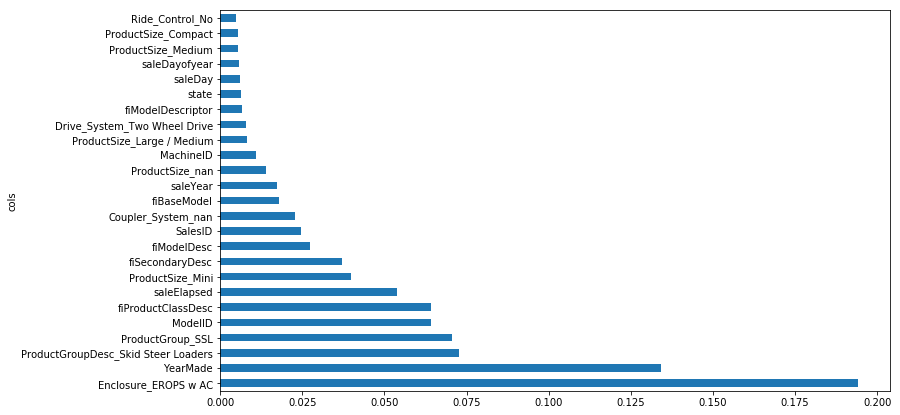

In [169]:
fi = rf_feature_imp(m, df_trn2)
plot_fi(fi[:25])

## Removing redundant features

In [170]:
from scipy.cluster import hierarchy as hc

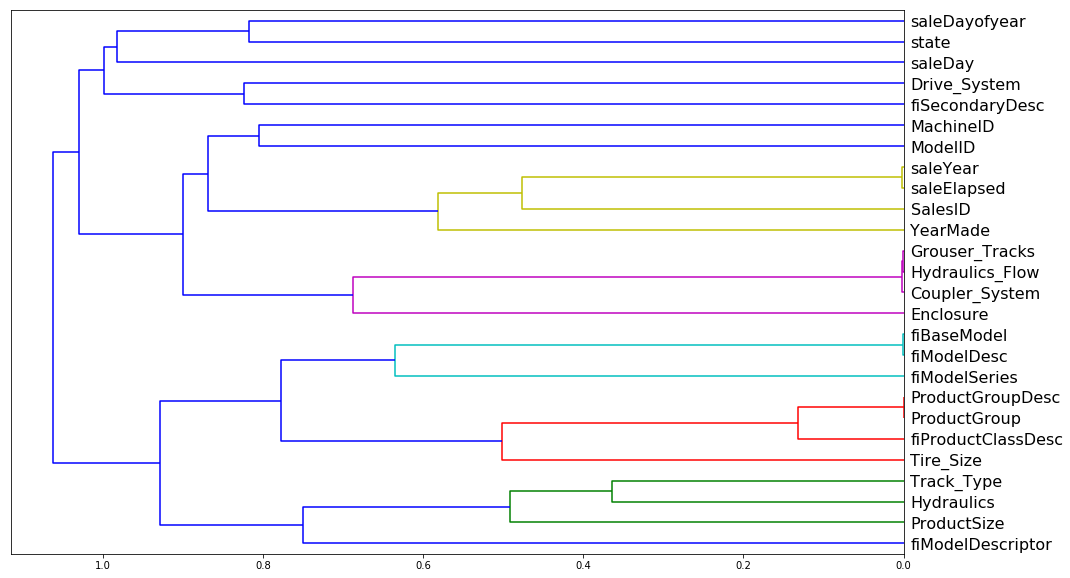

In [171]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

In [172]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=30, min_samples_leaf=5, max_features=0.6, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

In [173]:

get_oob(df_keep)

0.9075649742731381

In [174]:
for c in ('saleYear', 'saleElapsed', 'fiModelDesc', 'fiBaseModel', 'Grouser_Tracks', 'Coupler_System'):
    print(c, get_oob(df_keep.drop(c, axis=1)))

saleYear 0.9076051438154241
saleElapsed 0.9057361521546435
fiModelDesc 0.9071994000077293
fiBaseModel 0.907373157958702
Grouser_Tracks 0.9079414052109671
Coupler_System 0.907686697214976


In [175]:
to_drop = ['saleYear', 'fiBaseModel', 'Grouser_Tracks']
get_oob(df_keep.drop(to_drop, axis=1))

0.9065812863496309

In [176]:
df_keep.drop(to_drop, axis=1, inplace=True)
X_train, X_valid = split_vals(df_keep, n_trn)

In [177]:
np.save('tmp/keep_cols.npy', np.array(df_keep.columns))


In [179]:
# keep_cols = np.load('tmp/keep_cols.npy')
# df_keep = df_trn[keep_cols]

In [180]:
reset_rf_samples()

In [181]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.12528274773547193, 0.24255383898123775, 0.9673635910090604, 0.8921521246762381, 0.9098036811529636]


In [197]:
from pdpbox import pdp
from plotnine import *

In [186]:
set_rf_samples(50000)

In [189]:
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1)
m.fit(X_train, y_train);

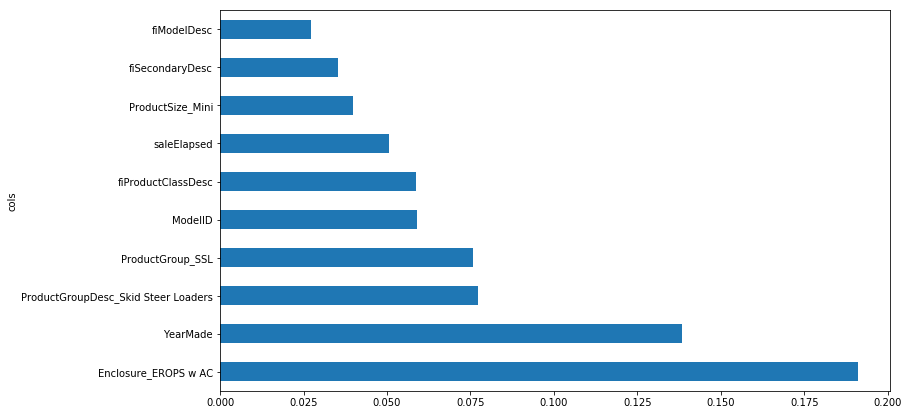

In [192]:
plot_fi(rf_feature_imp(m, df_trn2)[:10]);

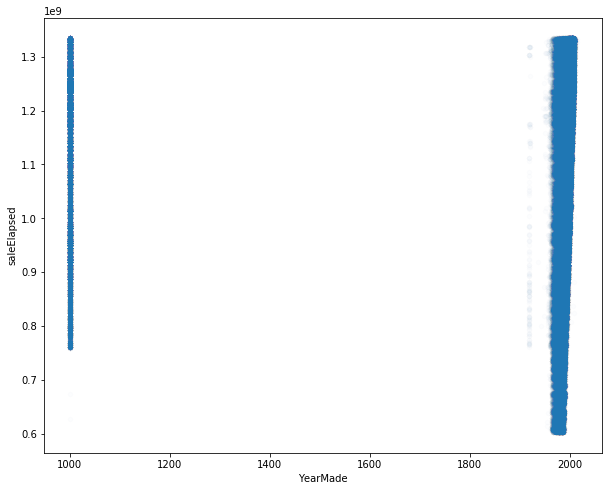

In [193]:
df_raw.plot('YearMade', 'saleElapsed', 'scatter', alpha=0.01, figsize=(10,8));

In [194]:
x_all = get_sample(df_raw[df_raw.YearMade>1930], 500)

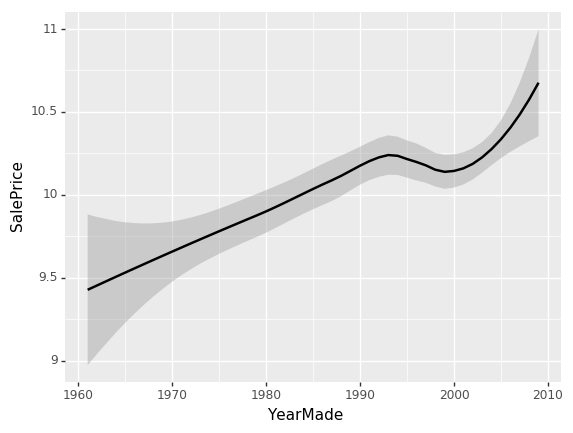

<ggplot: (8736974753856)>

In [200]:
ggplot(x_all, aes('YearMade', 'SalePrice'))+stat_smooth(se=True, method='loess')

In [201]:
x = get_sample(X_train[X_train.YearMade>1930], 500)

In [205]:
def plot_pdp(m, x, feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, x, feature=feat_name, model_features=x.columns)
    return pdp.pdp_plot(p, feat_name, plot_lines=True,
                        cluster=clusters is not None,
                        n_cluster_centers=clusters)

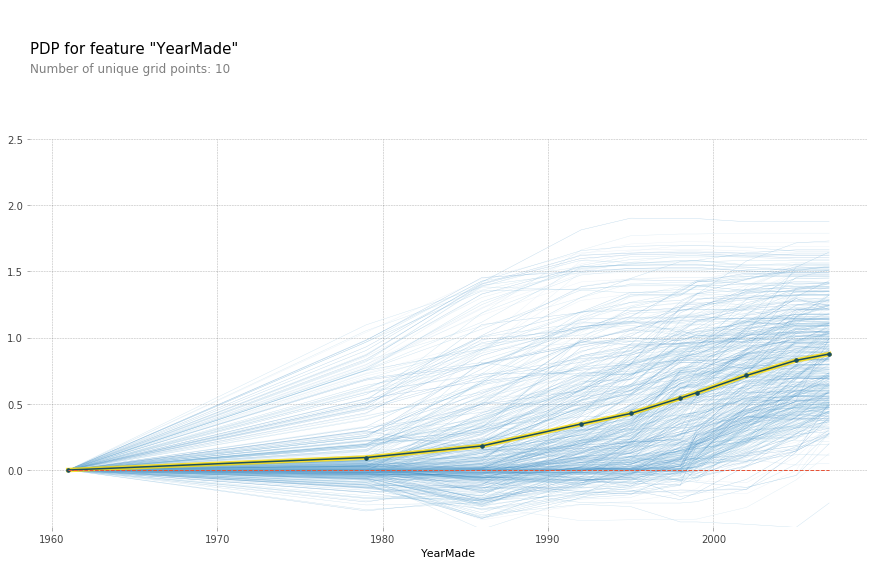

In [207]:
plot_pdp(m, x, 'YearMade');

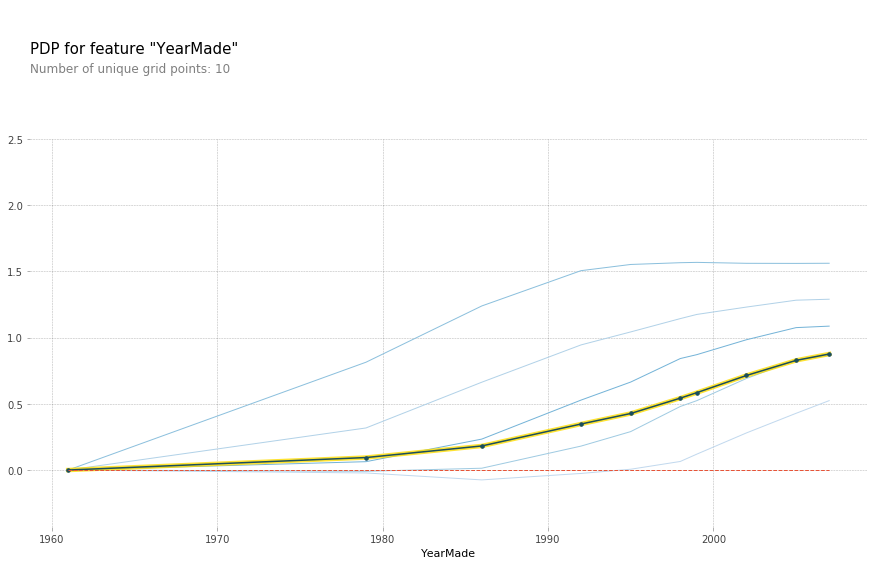

In [208]:
plot_pdp(m, x, 'YearMade', clusters=5);

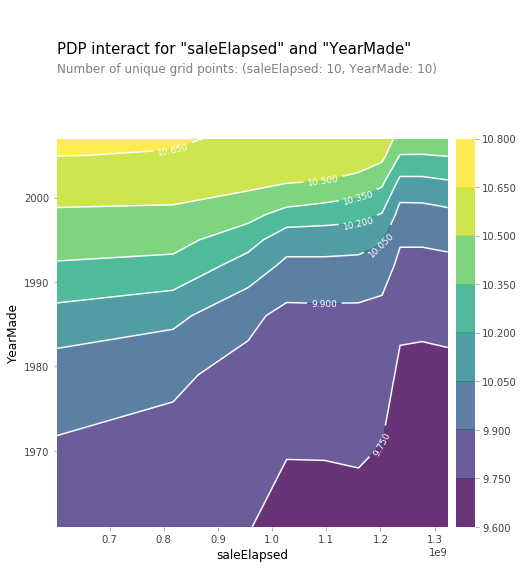

In [213]:
feats = ['saleElapsed', 'YearMade']
p = pdp.pdp_interact(m, x, features=feats, model_features=x.columns)
pdp.pdp_interact_plot(p, feats);

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f239784ff28>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f239783f908>})

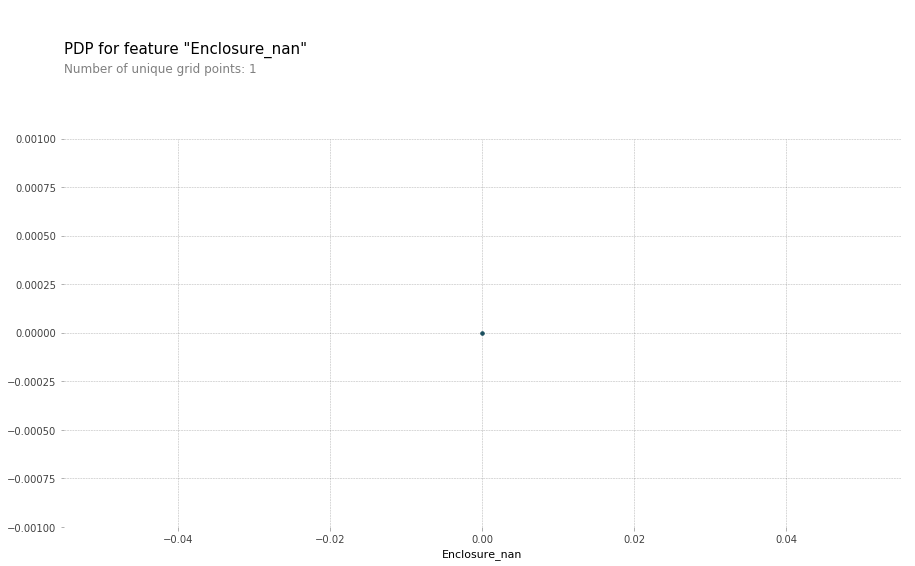

In [220]:
plot_pdp(m, x, ['Enclosure_EROPS w AC', 'Enclosure_EROPS', 'Enclosure_OROPS'], 5, 'Enclosure_nan')

In [221]:
df_raw.YearMade[df_raw.YearMade<1950] = 1950
df_keep['age'] = df_raw['age'] = df_raw.saleYear-df_raw.YearMade

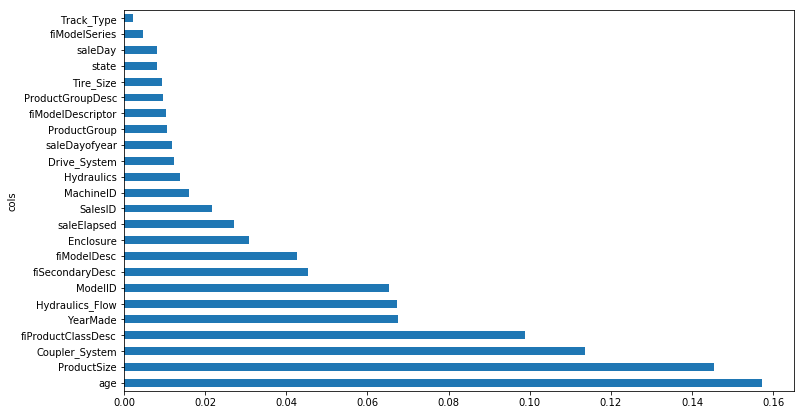

In [223]:
X_train, X_valid = split_vals(df_keep, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1)
m.fit(X_train, y_train)
plot_fi(rf_feature_imp(m, df_keep));